In [1]:
# importing the Libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# Importing the dataset

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN


In [3]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Unnamed: 5'],
      dtype='object')

In [3]:
dataset.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
Unnamed: 5                200
dtype: int64

In [5]:
data = dataset[['Annual Income (k$)','Spending Score (1-100)']].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

distance : [181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21862.092672182887, 19672.07284901432, 17887.084456628647]


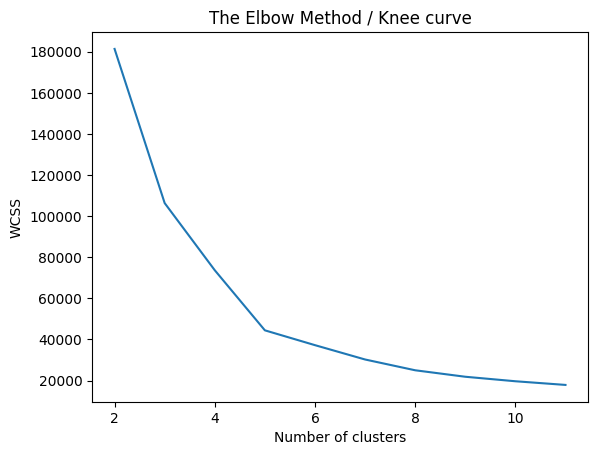

In [6]:
# Using the elbow method to find the optimal number of clusters

distance = []

cluster_number = range(2,12)

for i in cluster_number:
 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    
    kmeans.fit(data)
    
    distance.append(kmeans.inertia_) # within cluster sum

print("distance :",distance)

plt.plot(cluster_number, distance)

plt.title('The Elbow Method / Knee curve')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS') # within cluster sum of distances

plt.show()

In [ ]:
# Your WCSS can be equal to 0 if your number of data points is equal to the number of clusters you are creating.

# Here the ideal value of K is 5 because for the k values from 3-5 there is a sharp/steep reduction in the WCSS and after 
# cluster 5 the WCSS is reducing a lower rate w.r.t increase in number of cluster. 

# So we can say that the slope of wcss reduction is decreasing significantly after value of k=5

In [7]:
# Fitting K-Means to the dataset , k = 5 , value of k would be - 0,1,2,3,4

kmeans = KMeans(n_clusters = 5, random_state=42)

y_kmeans = kmeans.fit_predict(data)  # fit  --> predicting

# The y_kmeans do have the predictions of the Kmeans algo on the data

dataset['result'] = y_kmeans

dataset
# dataset.result.unique()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,result
0,1,Male,19,15,39,NaN,2
1,2,Male,21,15,81,NaN,3
2,3,Female,20,16,6,NaN,2
3,4,Female,23,16,77,NaN,3
4,5,Female,31,17,40,NaN,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN,4
196,197,Female,45,126,28,NaN,1
197,198,Male,32,126,74,NaN,4
198,199,Male,32,137,18,NaN,1


In [8]:
dataset.result.unique()

array([2, 3, 0, 4, 1])

In [11]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [12]:
kmeans.cluster_centers_[dataset['result']]

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [26.30434783,

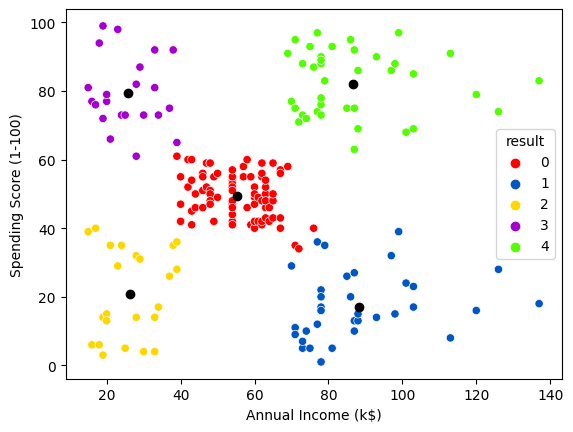

In [26]:
import seaborn as sns

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                data = dataset,
                hue = dataset.result ,
                palette = 'prism'
                )

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color = 'black', 
            # s = 50
            )

plt.show()

In [28]:
# predicting using Kmeans algo on a single data set

kmeans.predict(np.array([[20,100]]))

array([3])

In [29]:
dataset[dataset.result==4].head(12)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,result
123,124,Male,39,69,91,NaN,4
125,126,Female,31,70,77,NaN,4
127,128,Male,40,71,95,NaN,4
129,130,Male,38,71,75,NaN,4
131,132,Male,39,71,75,NaN,4
133,134,Female,31,72,71,NaN,4
135,136,Female,29,73,88,NaN,4
137,138,Male,32,73,73,NaN,4
139,140,Female,35,74,72,NaN,4
141,142,Male,32,75,93,NaN,4


In [14]:
dataset.to_csv('cluster data.csv')

In [ ]:
'''Steps to make prediction on New data'''
    

# df_test = pd.read_csv('test.csv')

# perform all the data preprocessing steps/ feature engg.(new feature if taken)

# choose feature which were taken to train the model

# df_test2= df_test[['A','B','C','D']]

# df_test['Predicted Y'] = model.predict(df_test2)

# PICKLE will be used for model deployment